In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from dbn import SupervisedDBNClassification

In [3]:
digits = load_digits()
X, Y = digits.data, digits.target
X = (X / 16)
X = X.astype(np.float32)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [4]:
classifier = SupervisedDBNClassification(hidden_layers_structure=[256, 256],
                                         learning_rate_rbm=0.05,
                                         learning_rate=0.1,
                                         n_epochs_rbm=10,
                                         n_iter_backprop=10,
                                         batch_size=32,
                                         activation_function='relu',
                                         dropout_p=0.2)
history = classifier.fit(X_train, Y_train)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 2.845892
>> Epoch 2 finished 	RBM Reconstruction error 1.858081
>> Epoch 3 finished 	RBM Reconstruction error 1.584153
>> Epoch 4 finished 	RBM Reconstruction error 1.217647
>> Epoch 5 finished 	RBM Reconstruction error 1.162859
>> Epoch 6 finished 	RBM Reconstruction error 1.028112
>> Epoch 7 finished 	RBM Reconstruction error 0.955512
>> Epoch 8 finished 	RBM Reconstruction error 0.861899
>> Epoch 9 finished 	RBM Reconstruction error 0.890633
>> Epoch 10 finished 	RBM Reconstruction error 0.833199
>> Epoch 1 finished 	RBM Reconstruction error 2.877138
>> Epoch 2 finished 	RBM Reconstruction error 1.493553
>> Epoch 3 finished 	RBM Reconstruction error 1.132245
>> Epoch 4 finished 	RBM Reconstruction error 0.918084
>> Epoch 5 finished 	RBM Reconstruction error 0.787292
>> Epoch 6 finished 	RBM Reconstruction error 0.683338
>> Epoch 7 finished 	RBM Reconstruction error 0.604655
>> Epoch 8 finished 	RBM Reconstructi

In [5]:
dir(classifier)

['W',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__metaclass__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_backpropagation',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_compute_activations',
 '_compute_loss',
 '_compute_output_layer_delta',
 '_compute_output_units',
 '_compute_output_units_matrix',
 '_determine_num_output_neurons',
 '_estimator_type',
 '_fine_tuning',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_stochastic_gradient_descent',
 '_transform_labels_to_network_format',
 '_transfo

In [6]:
Y_pred = classifier.predict(X_test)
print('Done.\nAccuracy: %f' % accuracy_score(Y_test, Y_pred))

Done.
Accuracy: 0.938889


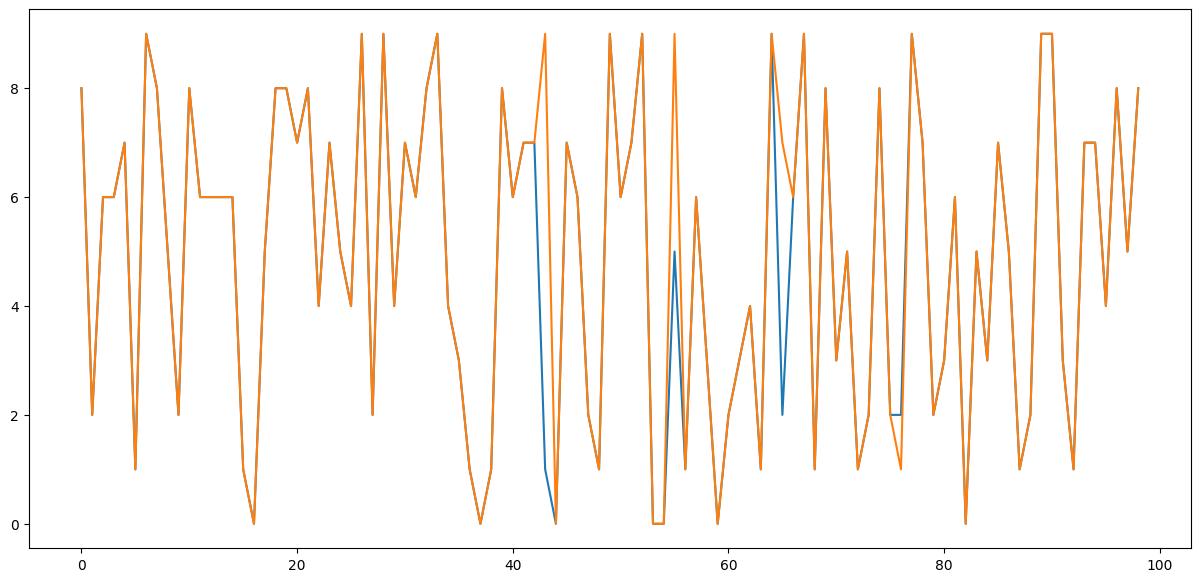

In [7]:
u = 1
l = 100
plt.figure(figsize=(15, 7))
plt.plot(Y_test[u:l], label="Actual")
plt.plot(Y_pred[u:l], label="Predicted")
plt.show()